In [1]:
#overload data
import pandas  as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
index=pd.date_range('2012-01-01', periods = 58465, freq = '15min')
data=pd.read_excel('bsm1LT.xlsx')
data.index=index
data.insert(17,'COD',data.iloc[:,1]+data.iloc[:,2]+data.iloc[:,3]+data.iloc[:,4]+data.iloc[:,5]+data.iloc[:,6]+data.iloc[:,7])
data.insert(18,'BOD',0.25*(data.iloc[:,2]+data.iloc[:,4]+(1-0.08)*(data.iloc[:,5]+data.iloc[:,6])))
data.insert(19,'Snkj',data.iloc[:,10]+data.iloc[:,11]+data.iloc[:,12]+0.08*(data.iloc[:,5]+data.iloc[:,6])+0.06*(data.iloc[:,3]+data.iloc[:,7]))
Clock=(['12 PM-6 AM']*24+['6 AM-12 AM']*24+['12 AM-6 PM']*24+['6 PM-12 PM']*24)*609+['6 PM-12 PM']
Season=['Autumn']*46*96+['Winter']*91*96+['Spring']*91*96+['Summer']*91*96+['Autumn']*91*96+['Winter']*91*96+['Spring']*91*96+['Summer']*17*96+['Summer']
data.insert(20,'Clock_6',Clock)
data.insert(21,'Season',Season)
print(data)

                              t         Si         Ss         Xi         Xs  \
2012-01-01 00:00:00    0.000000  30.000000  75.265000  50.955767  201.35489   
2012-01-01 00:15:00    0.010417  29.896443  70.380949  50.605668  202.47766   
2012-01-01 00:30:00    0.020833  29.858065  65.999456  50.143942  202.77697   
2012-01-01 00:45:00    0.031250  29.856741  62.200994  49.638921  202.52563   
2012-01-01 01:00:00    0.041667  29.875787  58.952897  49.127641  201.90738   
2012-01-01 01:15:00    0.052083  29.903695  56.176757  48.616921  201.00861   
2012-01-01 01:30:00    0.062500  29.923717  53.791485  48.081401  199.82625   
2012-01-01 01:45:00    0.072917  29.918419  51.731025  47.488768  198.33046   
2012-01-01 02:00:00    0.083333  29.880501  49.945689  46.829409  196.53166   
2012-01-01 02:15:00    0.093750  29.811199  48.394599  46.110375  194.47178   
2012-01-01 02:30:00    0.104167  29.718581  47.035562  45.345260  192.20652   
2012-01-01 02:45:00    0.114583  29.612506  45.82878

In [2]:
#Basic statistic description
data.describe()

t            Si            Ss            Xi            Xs  \
count  58465.000000  58465.000000  58465.000000  58465.000000  58465.000000   
mean     304.500000     27.900716     54.684608     48.293007    190.199208   
std      175.807668      5.155634     25.210761     16.160736     63.182291   
min        0.000000      2.389049      0.963165      1.307878     11.520647   
25%      152.250000     25.958065     34.618219     36.412195    143.134690   
50%      304.500000     28.758486     53.573595     49.589830    196.166430   
75%      456.750000     31.142770     72.406505     59.698929    234.761940   
max      609.000000     41.589261    139.341250     93.250629    355.842130   

                Xbh      Xba       Xp       So      Sno           Snh  \
count  58465.000000  58465.0  58465.0  58465.0  58465.0  58465.000000   
mean      26.481333      0.0      0.0      0.0      0.0     22.881110   
std        8.917541      0.0      0.0      0.0      0.0      8.532551   
min        1.705331      0.0      0.0      0.0      0.0      0.946093   
25%       19.878885      0.0      0.0      0.0      0.0     16.601091   
50%       27.265630      0.0      0.0      0.0      0.0     22.493694   
75%       32.863316      0.0      0.0      0.0      0.0     28.468017   
max       52.022621      0.0      0.0      0.0      0.0     51.802970   

                Snd           Xnd     Salk           TSS             Q  \
count  58465.000000  58465.000000  58465.0  58465.000000  58465.000000   
mean       5.426159      7.997720      7.0    198.730161  20850.541374   
std        2.084097      3.092165      0.0     65.831793   8499.755514   
min        0.249968      0.566803      7.0     13.705512   5110.098900   
25%        3.877753      5.557941      7.0    149.750830  14654.977000   
50%        5.360754      8.051810      7.0    204.775710  19670.050000   
75%        6.860155     10.267161      7.0    244.957590  25337.600000   
max       13.734128     18.351094      7.0    373.757890  59580.000000   

               Temp           COD           BOD          Snkj  
count  58465.000000  58465.000000  58465.000000  58465.000000  
mean      14.334018    347.558872     67.311661     41.321077  
std        3.421970    109.465321     22.679127     14.005758  
min        9.516753     29.235499      5.765696      4.778909  
25%       11.082545    265.482615     50.049240     30.572785  
50%       13.752611    357.020064     69.112888     41.550605  
75%       17.592312    425.618833     83.668726     51.035695  
max       20.487602    639.361935    128.011615     86.293234

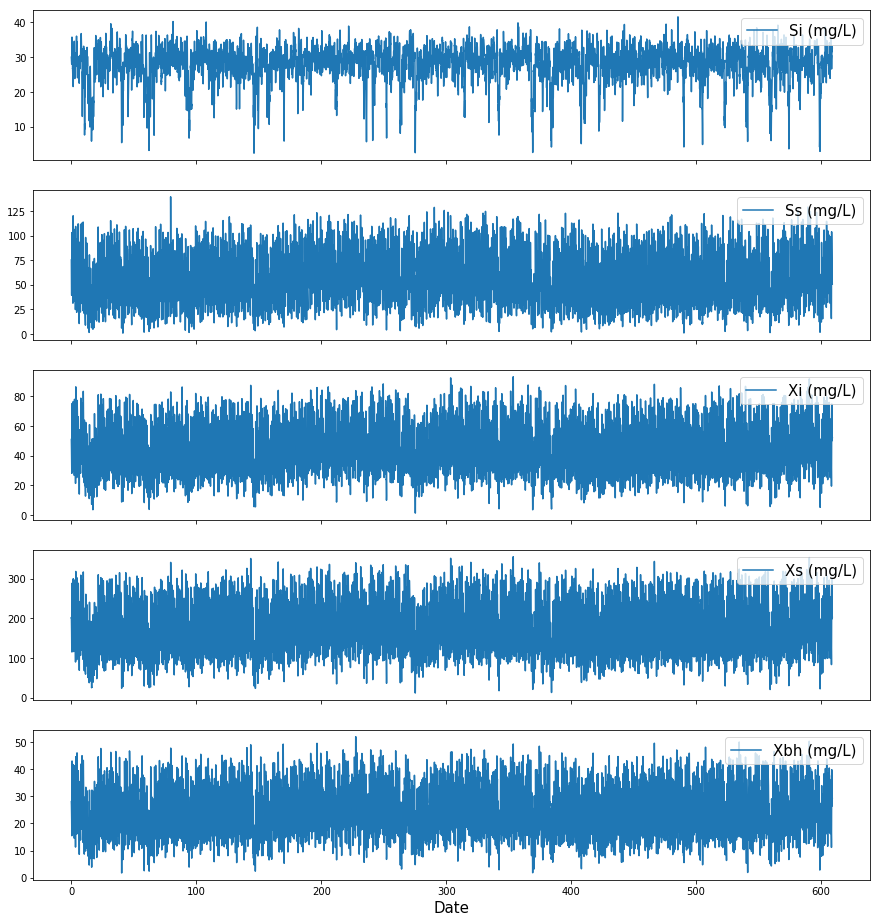

In [3]:
#Data visulization
plt.figure(figsize=(15,16),facecolor='white')
ax1 = plt.subplot(511)
Date=np.arange(0,609+1/96, 1/96)
plt.plot(Date, data['Si'].values,label='Si (mg/L)')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False, fontsize=15)
# share x only
ax2 = plt.subplot(512, sharex=ax1)
plt.plot(Date, data['Ss'].values,label='Ss (mg/L)')
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax3= plt.subplot(513, sharex=ax1)
plt.plot(Date, data['Xi'].values,label='Xi (mg/L)')
# make these tick labels invisible
plt.setp(ax3.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax4= plt.subplot(514, sharex=ax1)
plt.plot(Date, data['Xs'].values,label='Xs (mg/L)')
# make these tick labels invisible
plt.setp(ax4.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax5= plt.subplot(515, sharex=ax1)
plt.plot(Date, data['Xbh'].values,label='Xbh (mg/L)')
# make these tick labels invisible
plt.setp(ax5.get_xticklabels(), visible=True)
plt.xlabel('Date',fontsize=15)
plt.legend(loc=1,shadow=False,  fontsize=15)

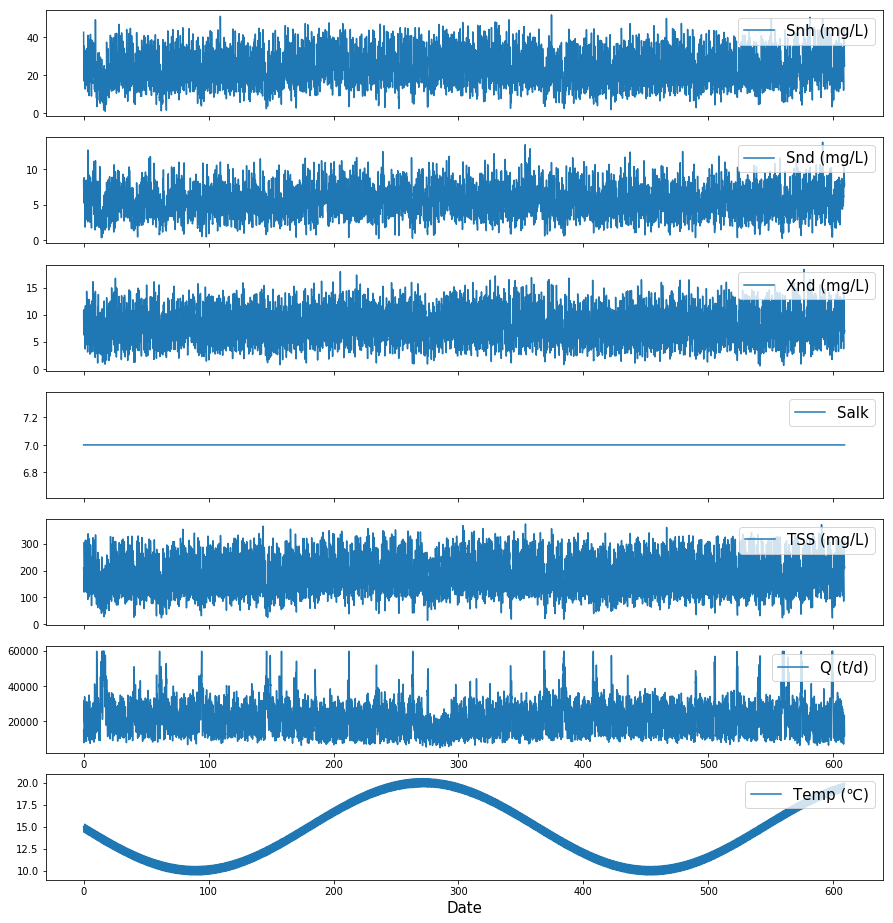

In [4]:
plt.figure(figsize=(15,16),facecolor='white')
ax1 = plt.subplot(711)
Date=np.arange(0,609+1/96, 1/96)
plt.plot(Date, data['Snh'].values,label='Snh (mg/L)')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False, fontsize=15)
# share x only
ax2 = plt.subplot(712, sharex=ax1)
plt.plot(Date, data['Snd'].values,label='Snd (mg/L)')
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax3= plt.subplot(713, sharex=ax1)
plt.plot(Date, data['Xnd'].values,label='Xnd (mg/L)')
# make these tick labels invisible
plt.setp(ax3.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax4= plt.subplot(714, sharex=ax1)
plt.plot(Date, data['Salk'].values,label='Salk')
# make these tick labels invisible
plt.setp(ax4.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax5= plt.subplot(715, sharex=ax1)
plt.plot(Date, data['TSS'].values,label='TSS (mg/L)')
# make these tick labels invisible
plt.setp(ax5.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax6= plt.subplot(716, sharex=ax1)
plt.plot(Date, data['Q'].values,label='Q (t/d)')
# make these tick labels invisible
plt.setp(ax6.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax7= plt.subplot(717, sharex=ax1)
plt.plot(Date, data['Temp'].values,label='Temp (℃)')
# make these tick labels invisible
plt.setp(ax6.get_xticklabels(), visible=True)
plt.xlabel('Date',fontsize=15)
plt.legend(loc=1,shadow=False,  fontsize=15)

Text(0,0.5,'PC2 (0.02%)')

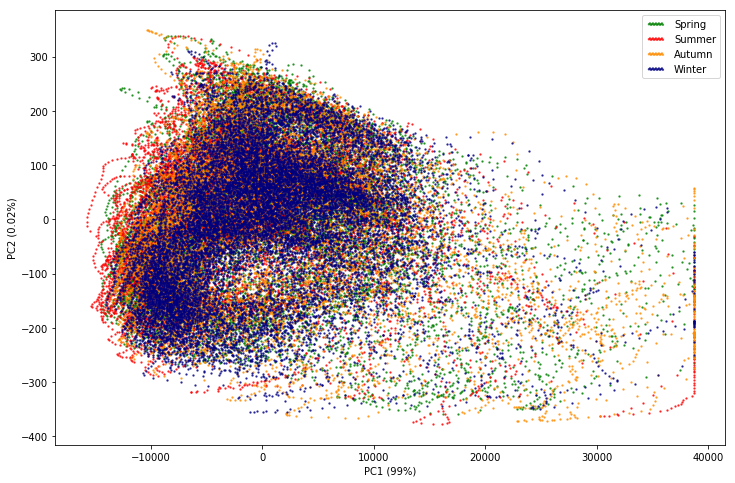

In [5]:
from sklearn.decomposition import PCA, IncrementalPCA
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
data_ipca = ipca.fit_transform(data[['COD','BOD','TSS','Snkj','Q','Temp']])

pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data[['COD','BOD','TSS','Snkj','Q','Temp']])

colors = ['green', 'red', 'darkorange','navy']

Season=['Spring','Summer','Autumn','Winter']
plt.figure(figsize=(12,8),facecolor='white')
for color, i in zip(colors, Season):
    plt.scatter(x=data_ipca[data.iloc[:,-1].values==i,0],y=data_ipca[data.iloc[:,-1].values==i,1],s=2,alpha=0.65,color=color,label=i)
plt.legend(loc="best", shadow=False, scatterpoints=15)
plt.xlabel('PC1 (99%)',fontsize=10)
plt.ylabel('PC2 (0.02%)',fontsize=10)

Text(0,0.5,'PC2 (0.02%)')

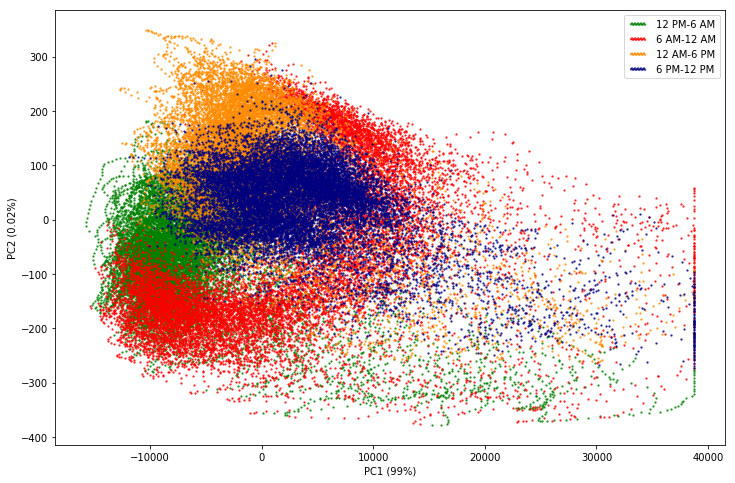

In [6]:
Clock_6=['12 PM-6 AM','6 AM-12 AM','12 AM-6 PM','6 PM-12 PM']
plt.figure(figsize=(12,8),facecolor='white')
for color, i in zip(colors, Clock_6):
    plt.scatter(x=data_ipca[data.iloc[:,-2].values==i,0],y=data_ipca[data.iloc[:,-2].values==i,1],s=2,alpha=0.65,color=color,label=i)
plt.legend(loc="best", shadow=False, scatterpoints=15)
plt.xlabel('PC1 (99%)',fontsize=10)
plt.ylabel('PC2 (0.02%)',fontsize=10)

In [7]:
print(ipca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)

[  9.99764484e-01   2.33263857e-04]
[  9.99764484e-01   2.33263914e-04]


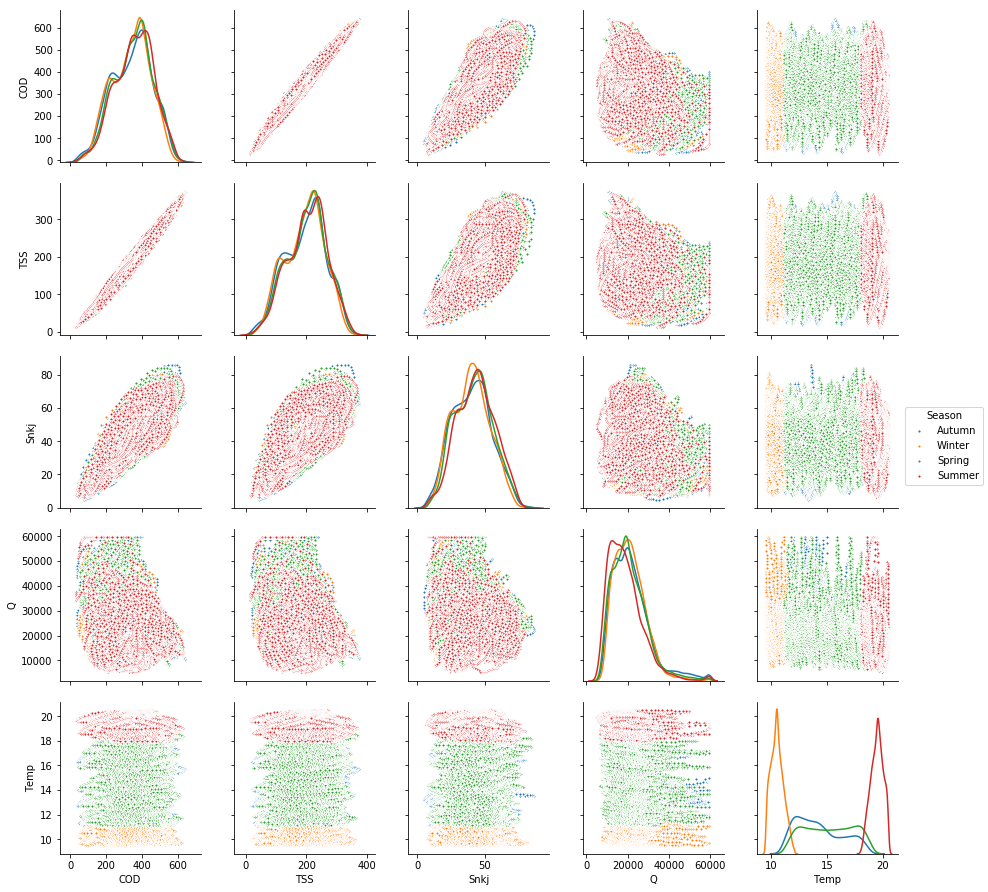

In [8]:
def Pairplot(self):
    
    sns.pairplot(self,vars=['COD','TSS','Snkj','Q','Temp'],hue='Season',diag_kind='kde',plot_kws={'s':10})
    plt.show()
Pairplot(data)

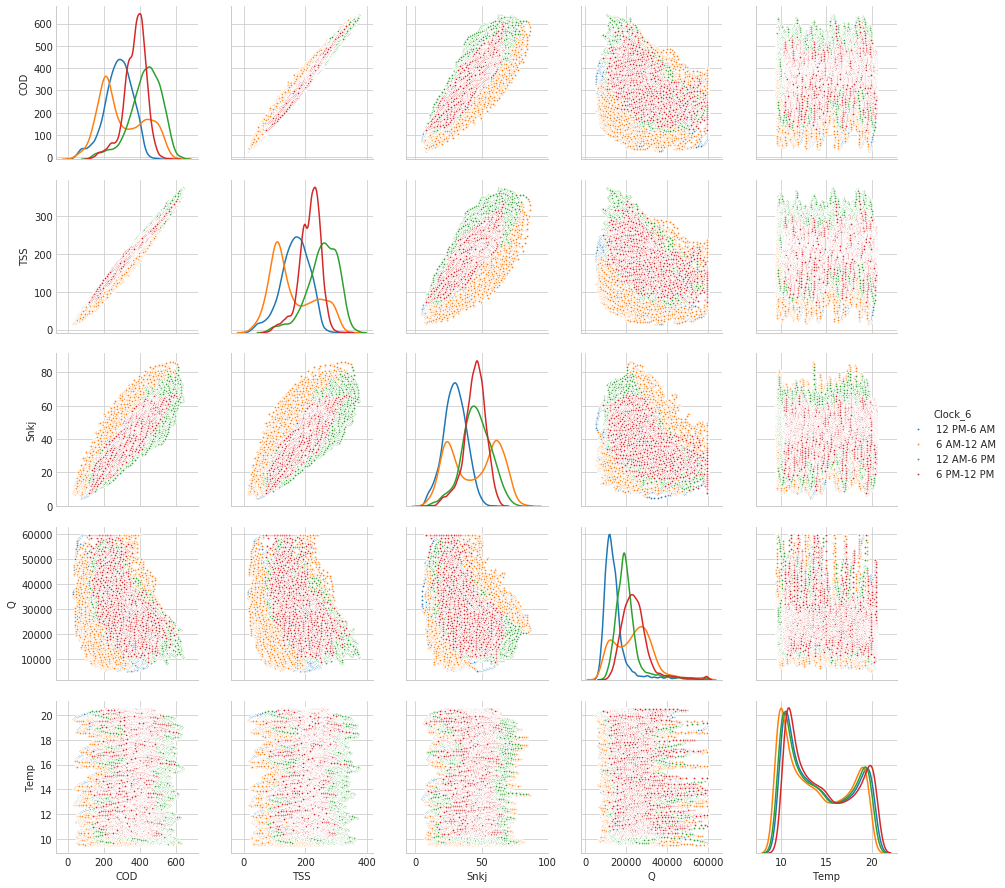

In [9]:
def Pairplot(self):
    sns.set_style('whitegrid')
    sns.pairplot(self,vars=['COD','TSS','Snkj','Q','Temp'],hue='Clock_6',diag_kind='kde',palette="tab10",plot_kws={'alpha':0.95,'s':8})
    plt.show()
Pairplot(data)

In [2]:
#Data normalization and reduction
from sklearn import preprocessing
import math
data_scaled = preprocessing.scale(data.iloc[:,1:-2])
Scaled=pd.DataFrame(data_scaled,columns=['Si', 'Ss', 'Xi', 'Xs', 'Xbh', 'Xba', 'Xp', 'So', 'Sno', 'Snh',
       'Snd', 'Xnd', 'Salk', 'TSS', 'Q', 'Temp', 'COD', 'BOD', 'Snkj'],index=index)
Scaled.insert(19,'t',np.arange(58465))

Scaled=Scaled[Scaled['t']%8==0]
Reduction=Scaled.drop(['t'],axis=1)
print(Reduction)


                           Si        Ss        Xi        Xs       Xbh  Xba  \
2012-01-01 00:00:00  0.407186  0.816341  0.164769  0.176565  0.174299  0.0   
2012-01-01 02:00:00  0.384008 -0.187974 -0.090566  0.100226  0.031058  0.0   
2012-01-01 04:00:00  0.222585 -0.519446 -0.485200 -0.210385 -0.222937  0.0   
2012-01-01 06:00:00  0.048478 -0.602719 -0.856236 -0.568247 -0.536852  0.0   
2012-01-01 08:00:00  0.438179  0.001331 -1.224348 -1.125169 -1.125134  0.0   
2012-01-01 10:00:00  1.437280  1.894310  0.269549  0.134606  0.322460  0.0   
2012-01-01 12:00:00  1.519158  1.506064  1.508474  1.446596  1.730410  0.0   
2012-01-01 14:00:00  1.078813  0.707563  1.517088  1.292904  1.514982  0.0   
2012-01-01 16:00:00  0.505036 -0.065138  0.996149  0.576687  0.679382  0.0   
2012-01-01 18:00:00  0.740536  0.527316  0.365691  0.031557 -0.035981  0.0   
2012-01-01 20:00:00  0.385267  0.160930  0.178572 -0.025615 -0.119879  0.0   
2012-01-01 22:00:00 -0.094131 -0.128268 -0.142875 -0.140570 -0.2

(5847, 3) [ 0.54748677  0.21829848  0.15038591]


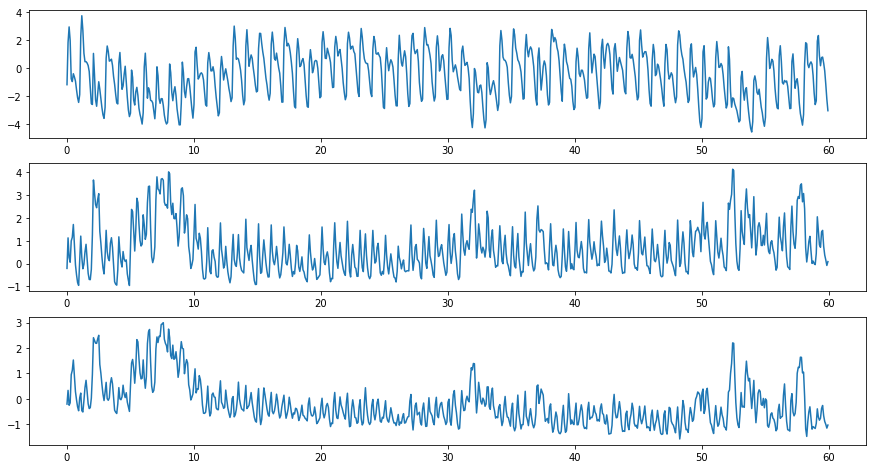

In [3]:
#Training datasets and testing 
train_ratio=0.6
valid_ratio=0.2
test_ratio=0.2
train=Reduction[['TSS','Q','Temp','COD','Snkj']].values[:round(7309*(train_ratio+valid_ratio))]
test=Reduction[['TSS','Q','Temp','COD','Snkj']].values[round(7309*(train_ratio+valid_ratio)):]

from sklearn.decomposition import PCA, IncrementalPCA
n_components = 3
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
train_ipca = ipca.fit_transform(train)
a=60
x=100
plt.figure(figsize=(15,8))
ax1 = plt.subplot(311)
plt.plot(np.arange(0,a,1/12),train_ipca[x:x+a*12,0])
train_ipca = ipca.fit_transform(train)
ax2= plt.subplot(312,sharex=ax1)
plt.plot(np.arange(0,a,1/12),train_ipca[x:x+a*12,1])
ax3= plt.subplot(313,sharex=ax1)
plt.plot(np.arange(0,a,1/12),train_ipca[x:x+a*12,2])
print(train_ipca.shape,ipca.explained_variance_ratio_)

                          pc1       pc2       pc3
2012-01-02 00:00:00 -1.942489 -0.256466  0.341729
2012-01-02 02:00:00 -1.218785  0.246114  0.422827
2012-01-02 04:00:00 -1.140232  0.259893  0.353316
2012-01-02 06:00:00 -0.875428  0.040353  0.132567
2012-01-02 08:00:00 -0.384459 -0.573359 -0.351401
2012-01-02 10:00:00  0.377607 -0.040128 -0.058437
2012-01-02 12:00:00  0.089838  0.186886  0.154804
2012-01-02 14:00:00 -0.315472 -0.158552 -0.063656
2012-01-02 16:00:00  0.236002 -0.669947 -0.519029
2012-01-02 18:00:00  1.016502 -0.535713 -0.529865
2012-01-02 20:00:00  1.132311 -0.647605 -0.631759
2012-01-02 22:00:00  1.583023 -0.450204 -0.560719
2012-01-03 00:00:00  1.084815  0.099973 -0.091080
2012-01-03 02:00:00  0.809169 -0.340438 -0.365282
2012-01-03 04:00:00  0.938828 -0.204215 -0.277642
2012-01-03 06:00:00  0.726982  0.022679 -0.087426
2012-01-03 08:00:00  0.124660  0.448852  0.260575
2012-01-03 10:00:00 -0.072159  0.139794  0.038545
2012-01-03 12:00:00 -0.036099 -0.032715 -0.064780


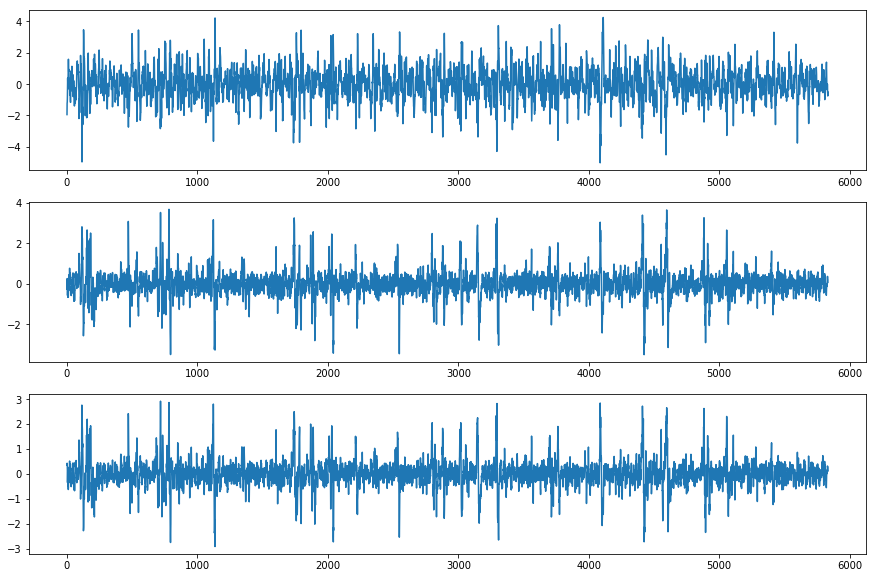

The result of the stationarity (pc1):p= 0.0
The result of the stationarity (pc2):p= 0.0
The result of the stationarity (pc3):p= 0.0
The result of the stochastic (pc1):p= 0.0
The result of the stochastic (pc2):p= 0.0
The result of the stochastic (pc3):p= 0.0


In [33]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.tsa.stattools as st
ts=pd.DataFrame(train_ipca,index=Reduction[:round(7309*(train_ratio+valid_ratio))].index,columns=['pc1','pc2','pc3'])
ts_diff=ts.diff(12)
ts_diff=ts_diff.dropna()
print(ts_diff)
f = plt.figure(facecolor='white',figsize=(15,10))
ax1 = f.add_subplot(311)
ax1.plot(ts_diff['pc1'].values)
ax2 = f.add_subplot(312)
ax2.plot(ts_diff['pc2'].values)
ax3 = f.add_subplot(313)
ax3.plot(ts_diff['pc3'].values)
plt.show()
#平稳性检验
def test_stationarity(timeseries): 
    dftest = adfuller(timeseries, autolag='AIC') 
    return dftest
print("The result of the stationarity (pc1):p=",test_stationarity(ts_diff['pc1'].values)[1])
print("The result of the stationarity (pc2):p=",test_stationarity(ts_diff['pc2'].values)[1])
print("The result of the stationarity (pc3):p=",test_stationarity(ts_diff['pc3'].values)[1])
#随机性检验
def test_stochastic(ts): 
    p_value = acorr_ljungbox(ts, lags=1) #lags可自定义 
    return p_value
print("The result of the stochastic (pc1):p=",test_stochastic(ts_diff['pc1'].values)[1][0])
print("The result of the stochastic (pc2):p=",test_stochastic(ts_diff['pc2'].values)[1][0])
print("The result of the stochastic (pc3):p=",test_stochastic(ts_diff['pc3'].values)[1][0])



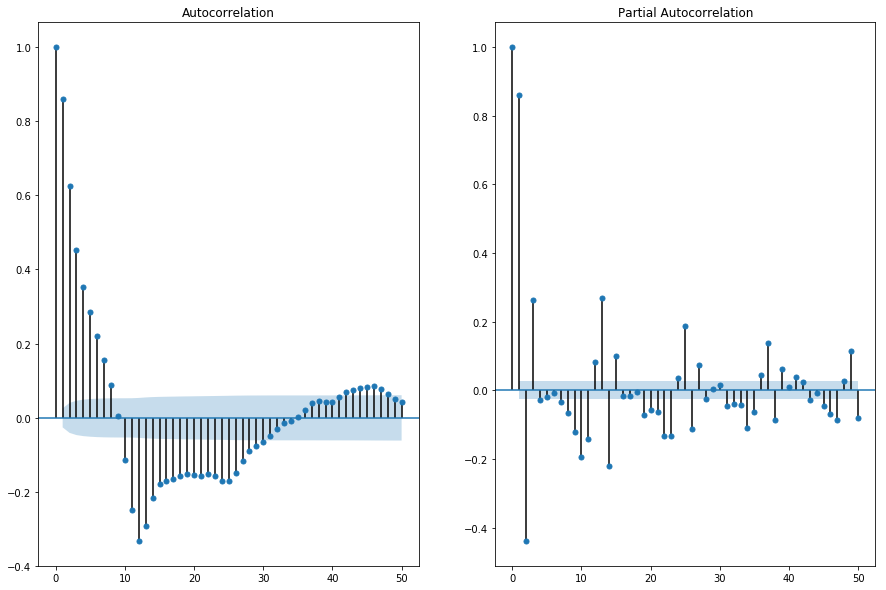

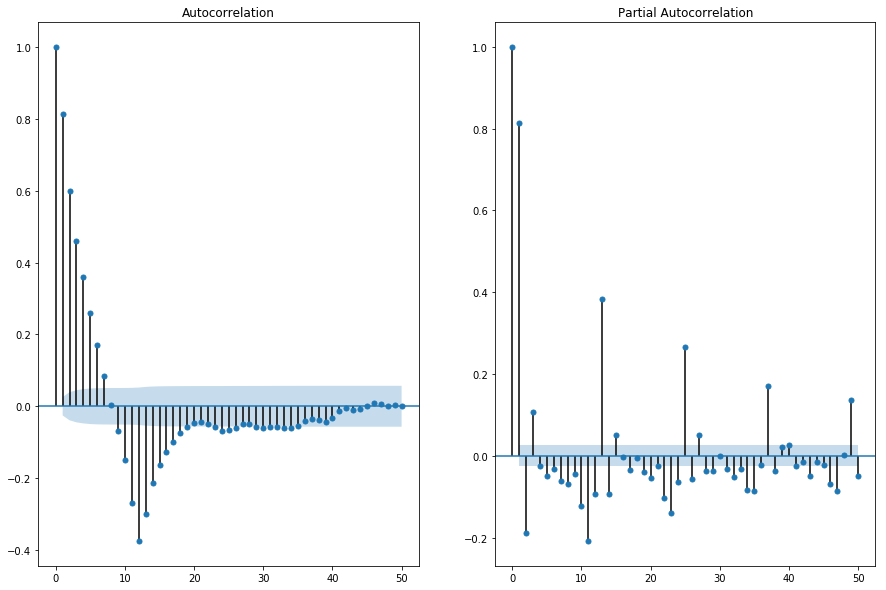

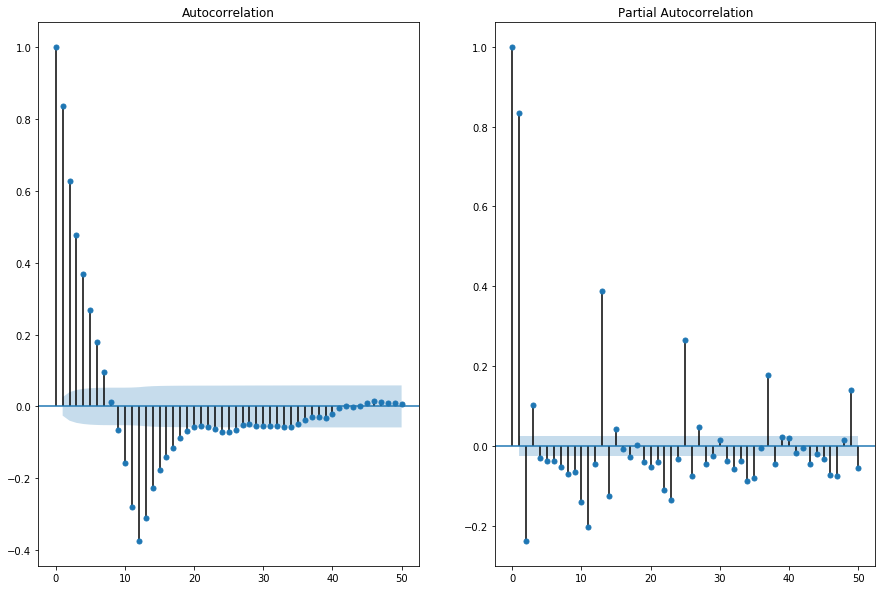

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
def draw_acf_pacf(ts, lags=50):
    f = plt.figure(facecolor='white',figsize=(15,10))
    ax1 = f.add_subplot(121)
    plot_acf(ts, lags=lags, ax=ax1)
    ax2 = f.add_subplot(122)
    plot_pacf(ts, lags=lags, ax=ax2)
    plt.show()
for i in range(3):
    draw_acf_pacf(ts_diff.iloc[:,i])



/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


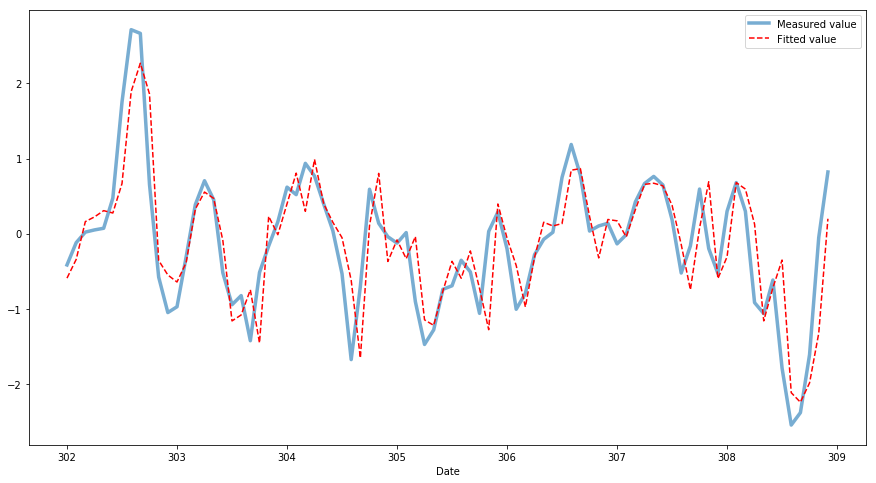

                           Statespace Model Results                           
Dep. Variable:                    pc1   No. Observations:                 5835
Model:               SARIMAX(3, 0, 6)   Log Likelihood               -3317.448
Date:                Sun, 30 Sep 2018   AIC                           6654.895
Time:                        11:39:56   BIC                           6721.611
Sample:                    01-02-2012   HQIC                          6678.096
                         - 05-02-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.3127      0.026     89.753      0.000       2.262       2.363
ar.L2         -2.0350      0.042    -48.938      0.000      -2.117      -1.954
ar.L3          0.6589      0.021     31.262      0.0

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


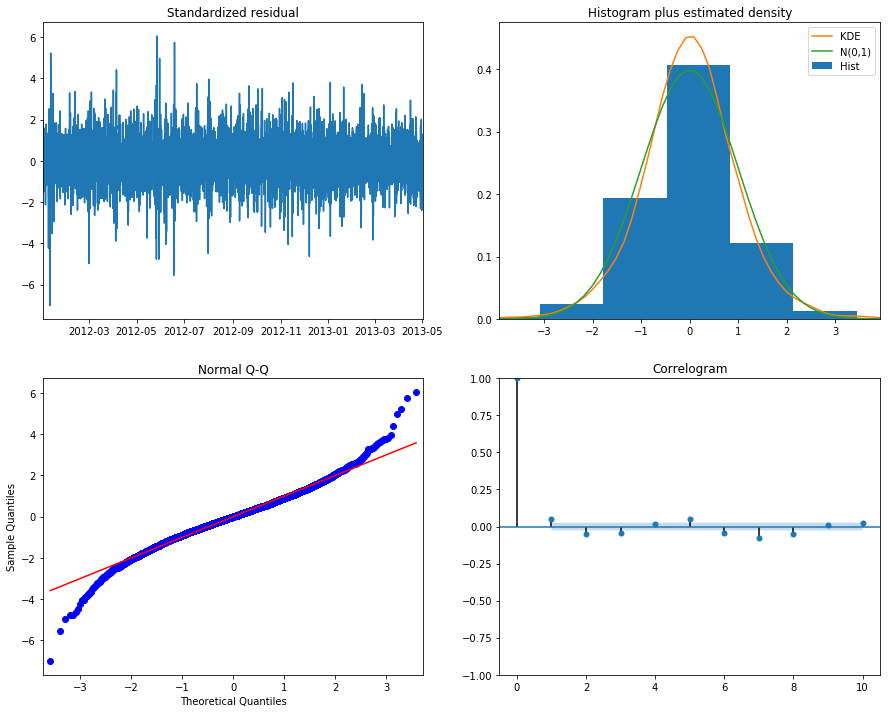

In [79]:
from statsmodels.tsa.arima_model import ARIMA
def Model_fit(df,col,a,b,c,period):
    ts=df[col]
    model= sm.tsa.statespace.SARIMAX(ts, order=(a, b, c),enforce_stationarity=False,
                                enforce_invertibility=False)

    result = model.fit(disp=0)
    plt.figure(figsize=(15,8))
    start_date=np.random.randint(0,484-period)
    end_date=start_date+period
    plt.plot(np.arange(start_date,end_date,1/12),ts[start_date*12:end_date*12].values,linewidth=3.5,alpha=0.6,label='Measured value')
    plt.plot(np.arange(start_date,end_date,1/12),result.fittedvalues[start_date*12:end_date*12].values,color='red',linestyle='--',label='Fitted value')
    plt.legend(fontsize=10)
    plt.xlabel('Date',fontsize=10)
    plt.show()

    print(result.summary())
    result.plot_diagnostics(figsize=(15, 12))
    plt.show()
    return result
result1=Model_fit(ts_diff,'pc1',3,0,6,7)


In [90]:
Dataset=Reduction[['TSS','Q','Temp','COD','Snkj']].values
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
Dimension_reduction= ipca.fit(Dataset)
#PCA 降维之后为dataset
dataset=Dimension_reduction.transform(Dataset)
Ureduce = Dimension_reduction.components_
dataset=pd.DataFrame(dataset,index=Reduction.index,columns=['pc1','pc2','pc3'])
dataset_diff=dataset.diff(12)
dataset_diff.dropna()
print(Ureduce)

    

[[ 0.57566071  0.07439748  0.08481141  0.59608932  0.54823745]
 [-0.12128795  0.86284267 -0.45943078 -0.07005265  0.15750473]
 [-0.07189021  0.461371    0.88023964 -0.0705278  -0.04661113]]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


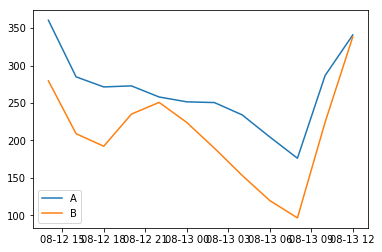

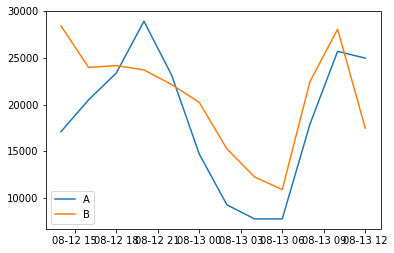

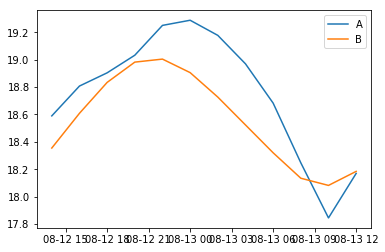

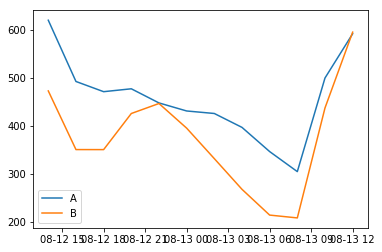

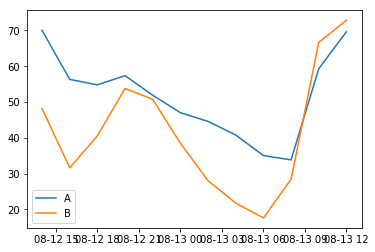

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


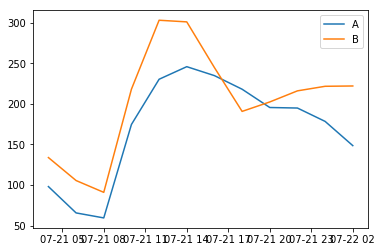

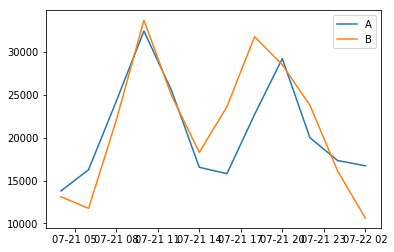

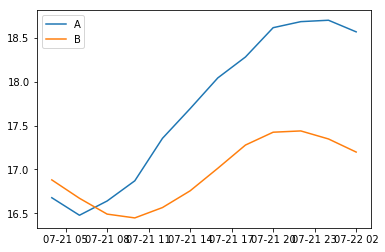

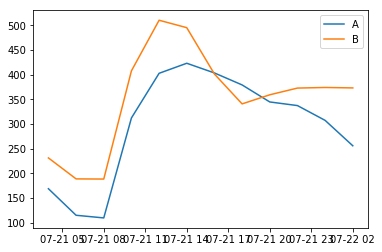

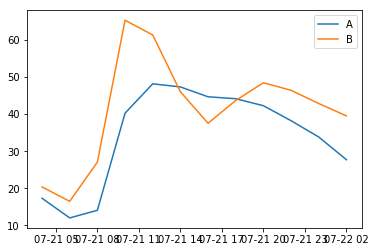

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


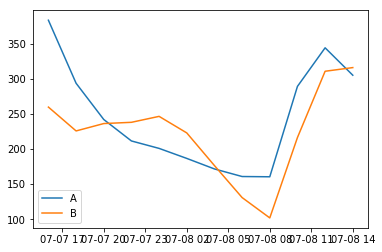

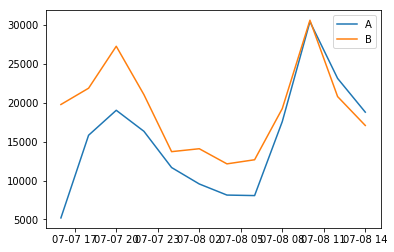

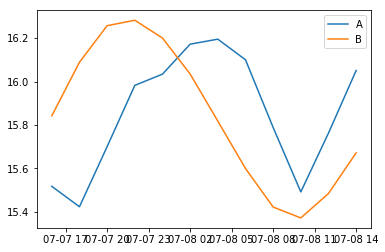

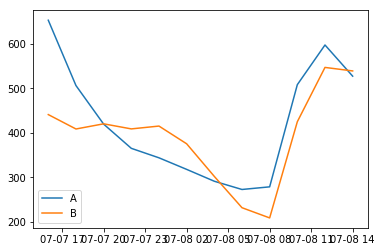

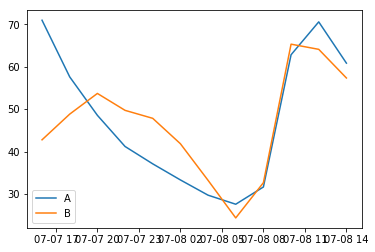

In [143]:
for i in range(3):
    k=np.random.randint(5840,7200)
    model= sm.tsa.statespace.SARIMAX(dataset_diff.iloc[0:k,0].values, order=(3, 0, 6),enforce_stationarity=False,enforce_invertibility=False).fit()
    predict1=model.forecast(12)+dataset.iloc[k:k+12,0].values
    model= sm.tsa.statespace.SARIMAX(dataset_diff.iloc[0:k,1].values, order=(3, 0, 6),enforce_stationarity=False,enforce_invertibility=False).fit()
    predict2=model.forecast(12)+dataset.iloc[k:k+12,1].values
    model= sm.tsa.statespace.SARIMAX(dataset_diff.iloc[0:k,2].values, order=(3, 0, 6),enforce_stationarity=False,enforce_invertibility=False).fit()
    predict3=model.forecast(12)+dataset.iloc[k:k+12,2].values
    time=dataset.index[k+12:k+24]
    #数据恢复
    Z=np.append(np.append(predict1.reshape(12,1),predict2.reshape(12,1),axis=1),predict3.reshape(12,1),axis=1)
    Prediction=np.dot(Z,Ureduce)
    valid=data.loc[:,['TSS','Q','Temp','COD','Snkj']]
    forecast=[]
    for i in range(5):
        forecast=np.append(forecast,Prediction[:,i]*valid.iloc[:,i].std()+valid.iloc[:,i].mean())
    forecast=forecast.reshape(5,12)
    for k in range(5):
        plt.plot(time,forecast[k],label='A')
        plt.plot(time,valid.loc[time].iloc[:,k].values,label='B')
        plt.legend()
        plt.show()
    
   
    

DatetimeIndex(['2013-06-30 00:00:00', '2013-06-30 02:00:00',
               '2013-06-30 04:00:00', '2013-06-30 06:00:00',
               '2013-06-30 08:00:00', '2013-06-30 10:00:00',
               '2013-06-30 12:00:00', '2013-06-30 14:00:00',
               '2013-06-30 16:00:00', '2013-06-30 18:00:00',
               '2013-06-30 20:00:00', '2013-06-30 22:00:00'],
              dtype='datetime64[ns]', freq='120T') [ 189.08977  163.88993  148.99139  135.34243  103.63674  208.25624
  294.66025  271.13778  212.47748  194.33465  225.50218  239.46271]


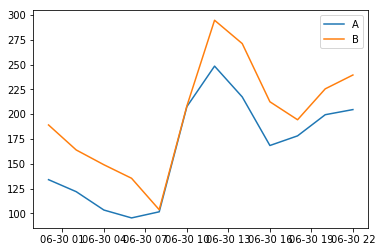

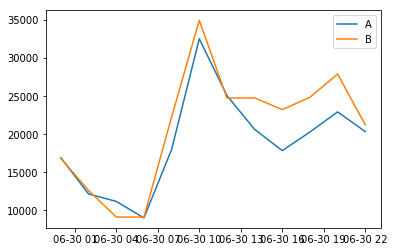

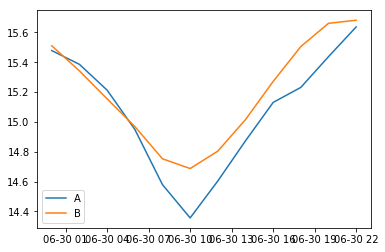

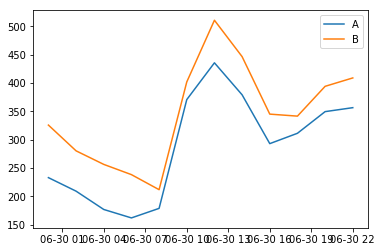

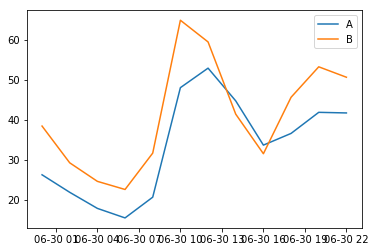

In [142]:
valid=data.loc[:,['TSS','Q','Temp','COD','Snkj']]
forecast=[]
print(time,valid.loc[time].iloc[:,0].values)
for i in range(5):
    forecast=np.append(forecast,Prediction[:,i]*valid.iloc[:,i].std()+valid.iloc[:,i].mean())
forecast=forecast.reshape(5,12)
for k in range(5):
    plt.plot(time,forecast[k],label='A')
    plt.plot(time,valid.loc[time].iloc[:,k].values,label='B')
    plt.legend()
    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Finished!


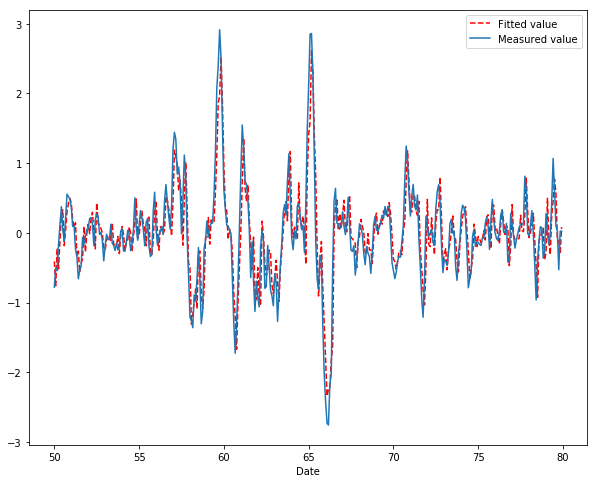

2012-01-02 00:00:00   -0.002105
2012-01-02 02:00:00    0.285378
2012-01-02 04:00:00    0.355913
2012-01-02 06:00:00    0.263444
2012-01-02 08:00:00    0.061966
2012-01-02 10:00:00   -0.385357
2012-01-02 12:00:00    0.065066
2012-01-02 14:00:00    0.124323
2012-01-02 16:00:00   -0.140252
2012-01-02 18:00:00   -0.530643
2012-01-02 20:00:00   -0.382336
2012-01-02 22:00:00   -0.611533
2012-01-03 00:00:00   -0.441261
2012-01-03 02:00:00    0.061631
2012-01-03 04:00:00   -0.464184
2012-01-03 06:00:00   -0.223436
2012-01-03 08:00:00    0.034385
2012-01-03 10:00:00    0.247250
2012-01-03 12:00:00   -0.127573
2012-01-03 14:00:00    0.083378
2012-01-03 16:00:00   -0.003503
2012-01-03 18:00:00    0.484442
2012-01-03 20:00:00    0.081386
2012-01-03 22:00:00   -0.079393
2012-01-04 00:00:00    0.075008
2012-01-04 02:00:00    0.365913
2012-01-04 04:00:00    0.204421
2012-01-04 06:00:00    0.355961
2012-01-04 08:00:00    0.255250
2012-01-04 10:00:00    0.093980
                         ...   
2013-04-

In [68]:

result3=Model_fit(ts['pc3'],8,0,3,50,80)
print(result.fittedvalues)

In [109]:
def Diff_cumsum(ts_diff,ts,column,diff=12):
    diff_cumsum=[]
    for i in range(diff):
        diff_cumsum.append(ts[i,column])

    for i in range(diff,len(ts_diff)+diff):

         diff_cumsum.append(diff_cumsum[i-12]+ts_diff[i-12])
    return diff_cumsum
A=np.array(Diff_cumsum(result1.fittedvalues.values,train_ipca,0,diff=12))
B=train_ipca[:,0]

In [40]:
def generator(data, lookback, delay, min_index, max_index, batch_size=128,train_ratio=0.6,valid_ratio=0.2,test_ratio=0.2):
        lookback = lookback + delay
        result = []
        data=data[min_index:max_index]
        for index in range(len(data) - lookback):
            result.append(data[index: index + lookback])
        result = np.array(result)
        print(result)
        row1 = round(train_ratio * result.shape[0])
        row2= row1+round(valid_ratio * result.shape[0])
        train = result[:row1]
        valid = result[row1:row2]
        test = result[row2:]
        train_sample=train[:,:-delay]
        train_target=train[:,-delay:]
        valid_sample=valid[:,:-delay]
        valid_target=valid[:,-delay:]
        test_sample=test[:,:-delay]
        test_target=test[:,-delay:]
        return train_sample,train_target,valid_sample,valid_target,test_sample,test_target
Dataset=Scaled[['TSS']].values
lookback=288
step=4
delay=48
batch_size=32
dataset=generator(data=Dataset,lookback=lookback,delay=delay,min_index=0,max_index=34560)
print(dataset[0].shape,dataset[1].shape,dataset[2].shape,dataset[3].shape)



[[[ 0.17513814]
  [ 0.18302072]
  [ 0.17949017]
  ..., 
  [ 1.59935139]
  [ 1.71726472]
  [ 1.82267761]]

 [[ 0.18302072]
  [ 0.17949017]
  [ 0.16893819]
  ..., 
  [ 1.71726472]
  [ 1.82267761]
  [ 1.91964922]]

 [[ 0.17949017]
  [ 0.16893819]
  [ 0.15414233]
  ..., 
  [ 1.82267761]
  [ 1.91964922]
  [ 2.00618595]]

 ..., 
 [[ 0.88831181]
  [ 1.01981459]
  [ 1.11897391]
  ..., 
  [ 0.53901802]
  [ 0.52653807]
  [ 0.50397659]]

 [[ 1.01981459]
  [ 1.11897391]
  [ 1.18583048]
  ..., 
  [ 0.52653807]
  [ 0.50397659]
  [ 0.47236272]]

 [[ 1.11897391]
  [ 1.18583048]
  [ 1.22371083]
  ..., 
  [ 0.50397659]
  [ 0.47236272]
  [ 0.43094044]]]
(20534, 288, 1) (20534, 48, 1) (6845, 288, 1) (6845, 48, 1)


In [41]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Flatten,Dropout,Activation
def build_model(layers):  #layers [1,50,100,1]
    model = Sequential()
    model.add(LSTM(layers[2], input_shape=(288,1,),return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers[2],return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(output_dim=layers[3]))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model
LSTM=build_model([1,288,50,48])
LSTM.summary()
                 
      

/home/zks/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=48)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 288, 50)           10400     
_________________________________________________________________
dropout_17 (Dropout)         (None, 288, 50)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 48)                2448      
_________________________________________________________________
activation_8 (Activation)    (None, 48)                0         
Total params: 33,048
Trainable params: 33,048
Non-trainable params: 0
_________________________________________________________________


In [63]:
from keras.optimizers import RMSprop
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
        yield samples, targets

lookback = 288
step = 4
delay = 48
batch_size = 128
train_gen = generator(Scaled[['TSS']].values,lookback=lookback,delay=delay,min_index=0,max_index=34560,shuffle=True,step=step,batch_size=batch_size)
val_gen = generator(Scaled[['TSS']].values,lookback=lookback,delay=delay,min_index=34560,max_index=44560,step=step,batch_size=batch_size)
val_steps=(44560-34560-lookback)
model = Sequential()
model.add(Flatten(input_shape=(lookback//step,Scaled[['TSS']].values.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=100,epochs=20,validation_data=val_gen,validation_steps=val_steps)
         

Epoch 1/20
100/100 [==============================] - 180s 2s/step - loss: 0.5338 - val_loss: 0.4388
Epoch 2/20
100/100 [==============================] - 155s 2s/step - loss: 0.4224 - val_loss: 0.4098
Epoch 3/20
100/100 [==============================] - 195s 2s/step - loss: 0.4111 - val_loss: 0.4009
Epoch 4/20
100/100 [==============================] - 194s 2s/step - loss: 0.3992 - val_loss: 0.3980
Epoch 5/20
100/100 [==============================] - 197s 2s/step - loss: 0.3940 - val_loss: 0.3811
Epoch 6/20
 97/100 [============================>.] - ETA: 0s - loss: 0.3857- ETA: 1s

KeyboardInterrupt: 